# Tourism Classification
<img src='header.png' width='880'>

The dataset describes 24,675 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.

Your goal is to accurately classify the range of expenditures a tourist spends in Tanzania.

The majority of the visitors under the age group of 25-44 came for business (18.5%), or leisure and holidays (53.2%), which is consistent with the fact that they are economically more productive. Those at the age group of 45-64 were more prominent in holiday making and visiting friends and relatives. The results further reveal that most visitors belonging to the age group of 18-24 came for leisure and holidays (55.3%) as well as volunteering (13.7%). The majority of senior citizens (65 and above) came for leisure and holidays (80.9%) and visiting friends and relatives (9.5%).

The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib . pyplot as plt
sns.set_style('darkgrid')
#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette('Accent')
import plotly.express as px
import plotly.io as pio

In [2]:
df_dict = pd.read_csv('VariableDefinitions.csv')
TrainDF = pd.read_csv('Train.csv')
TestDF = pd.read_csv('Test.csv')

In [3]:
TrainDF.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [6]:
TestDF.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes
2,tour_idf6itml6g,ITALY,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Beach Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,No,Yes,No,No,No,0,6,Yes
3,tour_id99u4znru,KENYA,25-44,Alone,0.0,1.0,Other,Beach Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,3,4,No
4,tour_idj4i9urbx,ZAMBIA,25-44,Alone,0.0,1.0,Business,Widlife Tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,6,0,No


In [7]:
df_dict

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [8]:
TrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tour_ID                18506 non-null  object 
 1   country                18506 non-null  object 
 2   age_group              18506 non-null  object 
 3   travel_with            17431 non-null  object 
 4   total_female           18504 non-null  float64
 5   total_male             18500 non-null  float64
 6   purpose                18506 non-null  object 
 7   main_activity          18506 non-null  object 
 8   info_source            18506 non-null  object 
 9   tour_arrangement       18506 non-null  object 
 10  package_transport_int  18506 non-null  object 
 11  package_accomodation   18506 non-null  object 
 12  package_food           18506 non-null  object 
 13  package_transport_tz   18506 non-null  object 
 14  package_sightseeing    18506 non-null  object 
 15  pa

In [9]:
TrainDF.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18504.000000,18500.000000,18506.000000,18506.000000
mean,0.936230,0.998757,9.141576,2.493516
std,1.215582,1.173177,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


In [12]:
TrainDF.select_dtypes(['object']).describe().T

,count,unique,top,freq
Tour_ID,18506,18506,tour_id1hffseyw,1
country,18506,131,UNITED STATES OF AMERICA,2846
age_group,18506,5,25-44,9047
travel_with,17431,5,Alone,7590
purpose,18506,8,Leisure and Holidays,11755
main_activity,18506,10,Widlife Tourism,5988
info_source,18506,8,"Travel agent, tour operator",8005
tour_arrangement,18506,2,Package Tour,9295
package_transport_int,18506,2,No,12238
package_accomodation,18506,2,No,9541


In [18]:
TrainDF.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

In [15]:
TestDF.isna().sum()

Tour_ID                    0
country                    0
age_group                  0
travel_with              361
total_female               2
total_male                 1
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
first_trip_tz              0
dtype: int64

<AxesSubplot:>

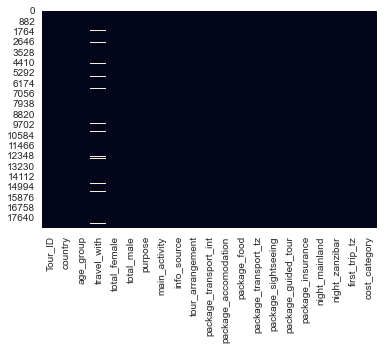

In [16]:
sns.heatmap(TrainDF.isna(), annot=False, cbar=False)

### handle missing data
let's fill this missing data in train and test set

In [19]:
def missingCols(df):
    df = df.isna().sum()
    return df[df>0]

In [20]:
missingCols(TrainDF)

travel_with     1075
total_female       2
total_male         6
dtype: int64

In [21]:
missingCols(TestDF)

travel_with     361
total_female      2
total_male        1
dtype: int64

In [29]:
df_dict[df_dict['Column Name'] == "travel_with"]['Definition'].values[0]

'The relation of people a tourist travel with to Tanzania'

In [31]:
px.histogram(TrainDF,x='travel_with',text_auto=True).update_xaxes(categoryorder="total descending")

**we will fill this missing travel_with with an unknown**
but first let's explore the total female and total male missing

<AxesSubplot:xlabel='total_male'>

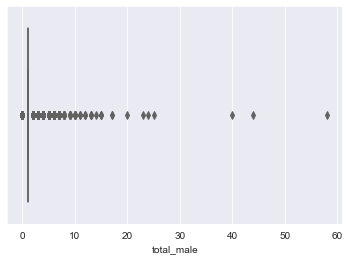

In [42]:
sns.boxplot(data = TrainDF, x ='total_male')

In [43]:
TrainDF[TrainDF['total_male'].isna()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
6195,tour_idcfe5lv3z,SOUTH AFRICA,25-44,With Other Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife Tourism,"Newspaper, magazines, brochures",Independent,...,No,No,No,No,No,No,4,0,Yes,Normal Cost
7092,tour_idzmkp9sq6,CHINA,25-44,With Other Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,4,2,Yes,Highest Cost
9350,tour_idgxm5bafr,SPAIN,45-64,With Other Friends/Relatives,7.0,NaN,Other,Hunting Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,Yes,11,0,No,Highest Cost
9571,tour_idaqxaa6li,FRANCE,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference Tourism,"Radio, TV, Web",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,6,0,Yes,Normal Cost
13076,tour_id7rzn4czm,GERMANY,45-64,With Other Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,23,0,No,Higher Cost
15585,tour_id41dez9e2,NETHERLANDS,45-64,With Other Friends/Relatives,11.0,NaN,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,No,Yes,No,No,Yes,No,5,0,Yes,Higher Cost


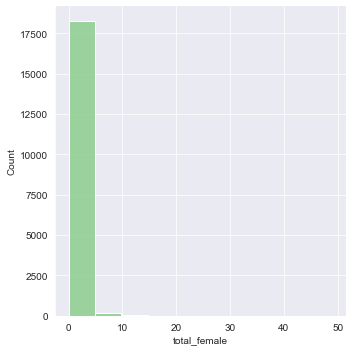

In [46]:
sns.displot(TrainDF['total_female'], bins=10)

In [38]:
TrainDF[TrainDF['total_female'].isna()]

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
7627,tour_idsgxazh59,FRANCE,25-44,With Other Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,Yes,9,5,Yes,Lower Cost
8388,tour_id1kmucs2v,ITALY,18-24,With Other Friends/Relatives,NaN,4.0,Volunteering,Wildlife Tourism,"Friends, relatives",Independent,...,No,No,No,No,No,No,15,0,Yes,High Cost


In [36]:
TrainDF['total_male'].median()

1.0

In [47]:
TrainDF['travel_with'] = TrainDF['travel_with'].fillna(value="unknown")
TrainDF['total_female'] = TrainDF['total_female'].fillna(value=TrainDF['total_female'].median())
TrainDF['total_male'] = TrainDF['total_male'].fillna(value=TrainDF['total_male'].median())

In [48]:
TestDF['travel_with'] = TestDF['travel_with'].fillna(value="unknown")
TestDF['total_female'] = TestDF['total_female'].fillna(value=TrainDF['total_female'].median())
TestDF['total_male'] = TestDF['total_male'].fillna(value=TrainDF['total_male'].median())

In [50]:
sum(TestDF.isna().sum())

0